# Milestone 2 analysis
## EAD Modules are located at the bottom of the notebook



# Task 1 

In [94]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statistics as stsc

In [95]:
df = pd.read_csv("../../data/raw/Video_game_sales_db.csv")
df


,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


In [9]:
df2019 = pd.read_csv("../../data/raw/vgsales-12-4-2019.csv")
df2019

,Rank,Name,basename,Genre,ESRB_Rating,Platform,Publisher,Developer,VGChartz_Score,Critic_Score,...,NA_Sales,PAL_Sales,JP_Sales,Other_Sales,Year,Last_Update,url,status,Vgchartzscore,img_url
0,1,Wii Sports,wii-sports,Sports,E,Wii,Nintendo,Nintendo EAD,NaN,7.7,...,NaN,NaN,NaN,NaN,2006.0,NaN,http://www.vgchartz.com/game/2667/wii-sports/?...,1,NaN,/games/boxart/full_2258645AmericaFrontccc.jpg
1,2,Super Mario Bros.,super-mario-bros,Platform,NaN,NES,Nintendo,Nintendo EAD,NaN,10.0,...,NaN,NaN,NaN,NaN,1985.0,NaN,http://www.vgchartz.com/game/6455/super-mario-...,1,NaN,/games/boxart/8972270ccc.jpg
2,3,Mario Kart Wii,mario-kart-wii,Racing,E,Wii,Nintendo,Nintendo EAD,NaN,8.2,...,NaN,NaN,NaN,NaN,2008.0,11th Apr 18,http://www.vgchartz.com/game/6968/mario-kart-w...,1,8.7,/games/boxart/full_8932480AmericaFrontccc.jpg
3,4,PlayerUnknown's Battlegrounds,playerunknowns-battlegrounds,Shooter,NaN,PC,PUBG Corporation,PUBG Corporation,NaN,NaN,...,NaN,NaN,NaN,NaN,2017.0,13th Nov 18,http://www.vgchartz.com/game/215988/playerunkn...,1,NaN,/games/boxart/full_8052843AmericaFrontccc.jpg
4,5,Wii Sports Resort,wii-sports-resort,Sports,E,Wii,Nintendo,Nintendo EAD,NaN,8.0,...,NaN,NaN,NaN,NaN,2009.0,NaN,http://www.vgchartz.com/game/24656/wii-sports-...,1,8.8,/games/boxart/full_7295041AmericaFrontccc.jpg
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55787,55788,Indivisible,indivisible,Role-Playing,NaN,PC,505 Games,Lab Zero Games,NaN,NaN,...,NaN,NaN,NaN,NaN,2019.0,11th Apr 19,http://www.vgchartz.com/game/224682/indivisibl...,1,NaN,/games/boxart/full_6339426AmericaFrontccc.jpg
55788,55789,Lost Ember,lost-amber,Adventure,RP,PC,Mooneye Studios,Mooneye Studios,NaN,NaN,...,NaN,NaN,NaN,NaN,2019.0,11th Apr 19,http://www.vgchartz.com/games/game.php?id=2246...,1,NaN,/games/boxart/full_8893129AmericaFrontccc.jpg
55789,55790,Lost Ember,lost-amber,Adventure,RP,PS4,Mooneye Studios,Mooneye Studios,NaN,NaN,...,NaN,NaN,NaN,NaN,2019.0,11th Apr 19,http://www.vgchartz.com/game/224690/lost-ember...,1,NaN,/games/boxart/full_6514293AmericaFrontccc.jpg
55790,55791,Lost Ember,lost-amber,Adventure,RP,XOne,Mooneye Studios,Mooneye Studios,NaN,NaN,...,NaN,NaN,NaN,NaN,2019.0,11th Apr 19,http://www.vgchartz.com/game/224688/lost-ember...,1,NaN,/games/boxart/full_6799693AmericaFrontccc.jpg


In [10]:
df2019.describe().T


,count,mean,std,min,25%,50%,75%,max
Rank,55792.0,27896.500000,16105.907446,1.00,13948.75,27896.50,41844.25,55792.00
VGChartz_Score,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Critic_Score,6536.0,7.213709,1.454079,1.00,6.40,7.50,8.30,10.00
User_Score,335.0,8.253433,1.401489,2.00,7.80,8.50,9.10,10.00
Total_Shipped,1827.0,1.887258,4.195693,0.03,0.20,0.59,1.80,82.86
Global_Sales,19415.0,0.365503,0.833022,0.00,0.03,0.12,0.36,20.32
NA_Sales,12964.0,0.275541,0.512809,0.00,0.05,0.12,0.29,9.76
PAL_Sales,13189.0,0.155263,0.399257,0.00,0.01,0.04,0.14,9.85
JP_Sales,7043.0,0.110402,0.184673,0.00,0.02,0.05,0.12,2.69
Other_Sales,15522.0,0.044719,0.129554,0.00,0.00,0.01,0.04,3.12


In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Rank,16598.0,8300.605254,4791.853933,1.00,4151.25,8300.50,12449.75,16600.00
Year,16327.0,2006.406443,5.828981,1980.00,2003.00,2007.00,2010.00,2020.00
NA_Sales,16598.0,0.264667,0.816683,0.00,0.00,0.08,0.24,41.49
EU_Sales,16598.0,0.146652,0.505351,0.00,0.00,0.02,0.11,29.02
JP_Sales,16598.0,0.077782,0.309291,0.00,0.00,0.00,0.04,10.22
Other_Sales,16598.0,0.048063,0.188588,0.00,0.00,0.01,0.04,10.57
Global_Sales,16598.0,0.537441,1.555028,0.01,0.06,0.17,0.47,82.74


---

In [12]:
"""
dfNa = pd.read_csv("../../data/raw/Video_game_sales_db.csv",
                  usecols = ["Rank", "Name", "Genre", "NA_Sales", "Year", "Platform"])
No longer in use as method chains
"""


'\ndfNa = pd.read_csv("../../data/raw/Video_game_sales_db.csv",\n                  usecols = ["Rank", "Name", "Genre", "NA_Sales", "Year", "Platform"])\nNo longer in use as method chains\n'

In [13]:
"""dfNa.dropna(axis = 1)
dfNa.reset_index(drop=True)
"""

'dfNa.dropna(axis = 1)\ndfNa.reset_index(drop=True)\n'

In [14]:
dfWii = (
    pd.read_csv("../../data/raw/Video_game_sales_db.csv",
    usecols = ["Rank", "Name", "Genre", "Global_Sales", "Year", "Platform"])
    .loc[lambda x: x["Platform"] == "Wii"] # We love Wii only wanna play Wii
    .loc[lambda x: x["Year"] >= 2000] # Check for only recent games 
    .loc[lambda x: x["Rank"] <= 2500] # Nothing ranked lower tan 2500
    .sort_values(by= "Global_Sales", ascending = False) # Cash money check
    .assign(Averaged_Sales = lambda x: x["Global_Sales"]/4) # Average out sales
    .reset_index(drop = True)
)
dfWii

# NO outlier precautions are taken here yet

,Rank,Name,Platform,Year,Genre,Global_Sales,Averaged_Sales
0,1,Wii Sports,Wii,2006.0,Sports,82.74,20.6850
1,3,Mario Kart Wii,Wii,2008.0,Racing,35.82,8.9550
2,4,Wii Sports Resort,Wii,2009.0,Sports,33.00,8.2500
3,8,Wii Play,Wii,2006.0,Misc,29.02,7.2550
4,9,New Super Mario Bros. Wii,Wii,2009.0,Platform,28.62,7.1550
...,...,...,...,...,...,...,...
194,2440,Blazing Angels: Squadrons of WWII,Wii,2007.0,Simulation,0.85,0.2125
195,2452,Karaoke Revolution Glee,Wii,2010.0,Misc,0.85,0.2125
196,2467,Harvest Moon: Tree of Tranquility,Wii,2007.0,Simulation,0.84,0.2100
197,2482,WWE SmackDown vs. Raw 2009,Wii,2008.0,Fighting,0.83,0.2075


In [15]:
dfWii.describe().T

,count,mean,std,min,25%,50%,75%,max
Rank,199.0,1290.010050,765.080137,1.0000,678.0000,1296.0000,2021.000,2497.000
Year,199.0,2008.713568,1.697701,2006.0000,2007.0000,2008.0000,2010.000,2015.000
Global_Sales,199.0,3.355829,7.561612,0.8300,1.0300,1.4700,2.340,82.740
Averaged_Sales,199.0,0.838957,1.890403,0.2075,0.2575,0.3675,0.585,20.685


In [16]:
# Setting the styles of the graphs following
sns.set_style("dark")
sns.set_theme(font_scale = 1, color_codes = True)


<AxesSubplot:xlabel='Averaged_Sales', ylabel='Genre'>

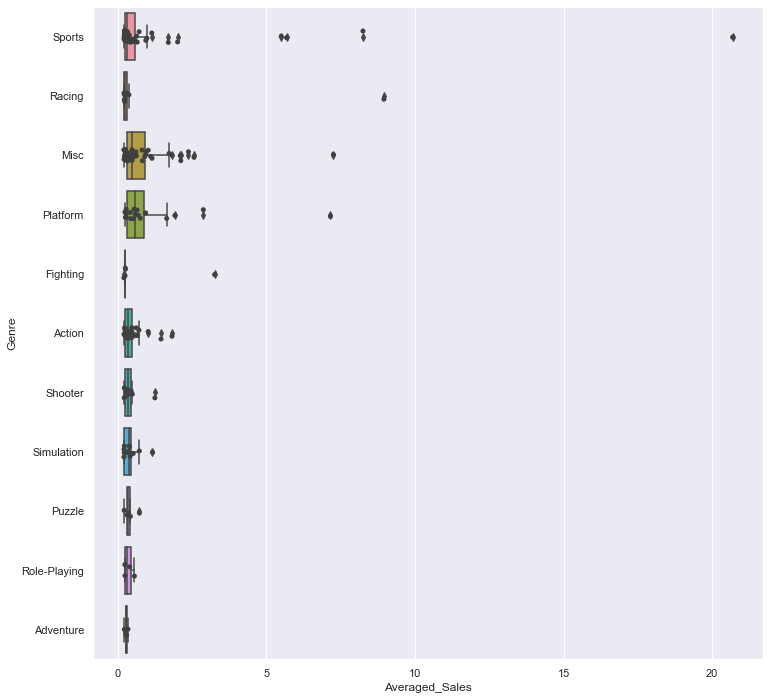

In [17]:
# Investigating Wii average sales per genre after year 2000, only running with games 
# ranked higher than 2500
# this to display the box plot
plt.figure(figsize=(12, 12))
sns.boxplot(data = dfWii, x = "Averaged_Sales", y = "Genre", whis = 1.5)
# swarm plot to display the datapoints over the box plot
sns.stripplot(data = dfWii, x = "Averaged_Sales", y = "Genre", color = "0.25")

# Outlier precautions taken here 
Might not be perfect, but we took some measure of removing high and low outliers arbituary


In [18]:
dfClean = (
        pd.read_csv("../../data/raw/Video_game_sales_db.csv",
        usecols = ["Rank", "Name", "Genre", "Global_Sales", "Year", "Platform"]) # So far our only focus of work
        .sort_values(by= "Global_Sales", ascending = False) # Cash money check
        .dropna(axis = 1) # Drop any NA values completely
        .reset_index(drop=True) # Reset index so we don't mess up orders
    )
dfClean

,Rank,Name,Platform,Genre,Global_Sales
0,1,Wii Sports,Wii,Sports,82.74
1,2,Super Mario Bros.,NES,Platform,40.24
2,3,Mario Kart Wii,Wii,Racing,35.82
3,4,Wii Sports Resort,Wii,Sports,33.00
4,5,Pokemon Red/Pokemon Blue,GB,Role-Playing,31.37
...,...,...,...,...,...
16593,16189,BattleForge,PC,Strategy,0.01
16594,16190,Jewel Quest II,PC,Puzzle,0.01
16595,16191,Toro to Morimori,PS3,Misc,0.01
16596,16192,Sonic & All-Stars Racing Transformed,PC,Racing,0.01


In [19]:
def load_and_process_Wii(filePath):

    dfClean = (
        pd.read_csv(filePath,
        usecols = ["Rank", "Name", "Genre", "Global_Sales", "Year", "Platform"]) # So far our only focus of work
        .sort_values(by = "Global_Sales", ascending = False) # Cash money check
        .dropna(axis = 0, thresh = 3) # Drop any NA values completely
        .loc[lambda x: x["Global_Sales"].between(5, 90.00)] # Remove the overkill outlier Wii sport saes at 80
        .reset_index(drop=True) # Reset index so we don't mess up orders
    )
    
    dfWii = (
        dfClean
        .loc[lambda x: x["Platform"] == "Wii"] # We love Wii only wanna play Wii
        .loc[lambda x: x["Year"] >= 2000] # Check for only recent games
        .loc[lambda x: x["Rank"] <= 2500] # Nothing ranked lower tan 2500
        .assign(Averaged_Sales = lambda x: x["Global_Sales"]/stsc.median(dfClean["Global_Sales"])) # Average out sales
        .sort_values(by= "Global_Sales", ascending = False) # Re-sort in case any vales got changed
        .reset_index(drop = True) # Order things nicely
    )
    return dfWii


In [20]:
dfWiiN = load_and_process_Wii("../../data/raw/Video_game_sales_db.csv")
dfWiiN.head(5)

,Rank,Name,Platform,Year,Genre,Global_Sales,Averaged_Sales
0,1,Wii Sports,Wii,2006.0,Sports,82.74,11.443983
1,3,Mario Kart Wii,Wii,2008.0,Racing,35.82,4.954357
2,4,Wii Sports Resort,Wii,2009.0,Sports,33.00,4.564315
3,8,Wii Play,Wii,2006.0,Misc,29.02,4.013831
4,9,New Super Mario Bros. Wii,Wii,2009.0,Platform,28.62,3.958506


<AxesSubplot:xlabel='Averaged_Sales', ylabel='Genre'>

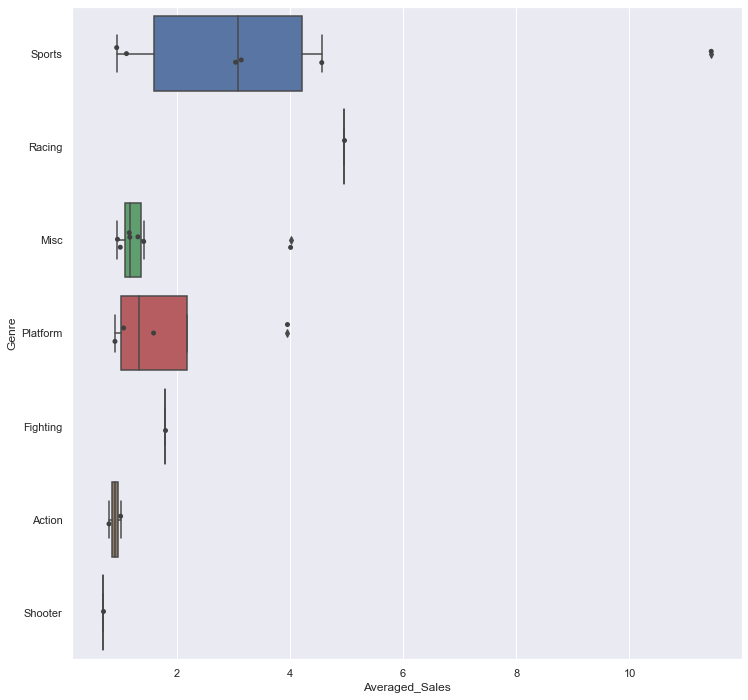

In [21]:
# Investigating Wii average sales per genre after year 2000, only running with games 
# ranked higher than 2500
# this to display the box plot
plt.figure(figsize=(12, 12))
sns.boxplot(data = dfWiiN, x = "Averaged_Sales", y = "Genre", whis = 1.5)
# swarm plot to display the datapoints over the box plot
sns.stripplot(data = dfWiiN, x = "Averaged_Sales", y = "Genre", color = "0.25")

<AxesSubplot:>

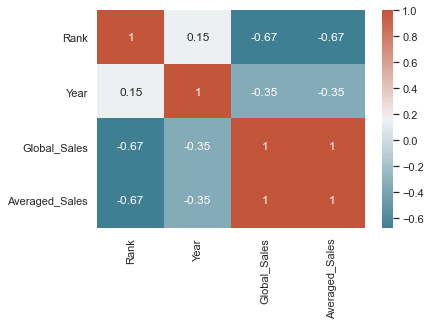

In [22]:
# Testing out a correlation and heatup 
wiiN = dfWiiN.corr()
sns.heatmap(wiiN, xticklabels=wiiN.columns, yticklabels=wiiN.columns, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))

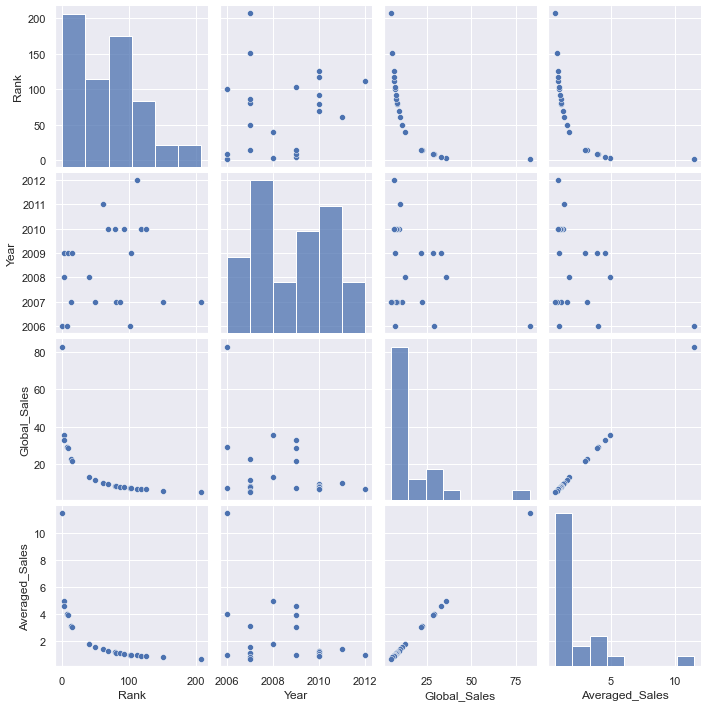

In [23]:
sns.pairplot(dfWiiN)

### Will have to resolve the issue of representing sales while dealing with certain too good selling Nintendo titles


## Starting analysis round 2 of Nintendo sales over the years


In [24]:
def load_and_process_Nintendo(filePath):
    import pandas as pd
    dfClean = (
        pd.read_csv(filePath,
        usecols = ["Rank", "Name", "Publisher", "Platform", "Genre", "Global_Sales", "Year"]) # So far our only focus of work
        .sort_values(by= "Global_Sales", ascending = False) # Cash money check
        .dropna(axis = 0, thresh = 3) # Drop any NA values completely
        .loc[lambda x: x["Global_Sales"].between(5, 90.00)] # Remove the overkill outlier Wii sport saes at 80
        #Excessive low number sales mess up our median so we are removing it for now by specifying values between 5-90
        .reset_index(drop=True) # Reset index so we don't mess up orders
    )

   # print(stsc.median(dfClean["Global_Sales"]))
   # print(stsc.mean(dfClean["Global_Sales"]))

    dfWii = (
        dfClean
        .loc[(dfClean["Publisher"] == "Nintendo")]
        #.loc[(dfClean["Platform"] == "Wii") | (dfClean["Platform"] == "DS")]
        .loc[lambda x: x["Year"] >= 2000] # Check for only recent games
        .loc[lambda x: x["Rank"] <= 2500] # Nothing ranked lower tan 2500
        .assign(median = stsc.median(dfClean["Global_Sales"]))
        .assign(Averaged_Sales = lambda x: x["Global_Sales"]/stsc.median(dfClean["Global_Sales"])) #Putting the sales number over its median to try and mitigate issues from the outliers
        .sort_values(by= "Global_Sales", ascending = False) # Re-sort in case any vales got changed
        .reset_index(drop = True) # Order things nicely
    )
    return dfWii

In [25]:
dfNin = load_and_process_Nintendo("../../data/raw/Video_game_sales_db.csv")
dfNin.head(5)

,Rank,Name,Platform,Year,Genre,Publisher,Global_Sales,median,Averaged_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,82.74,7.23,11.443983
1,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,35.82,7.23,4.954357
2,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,33.00,7.23,4.564315
3,7,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,30.01,7.23,4.150761
4,8,Wii Play,Wii,2006.0,Misc,Nintendo,29.02,7.23,4.013831


<AxesSubplot:xlabel='Year', ylabel='Averaged_Sales'>

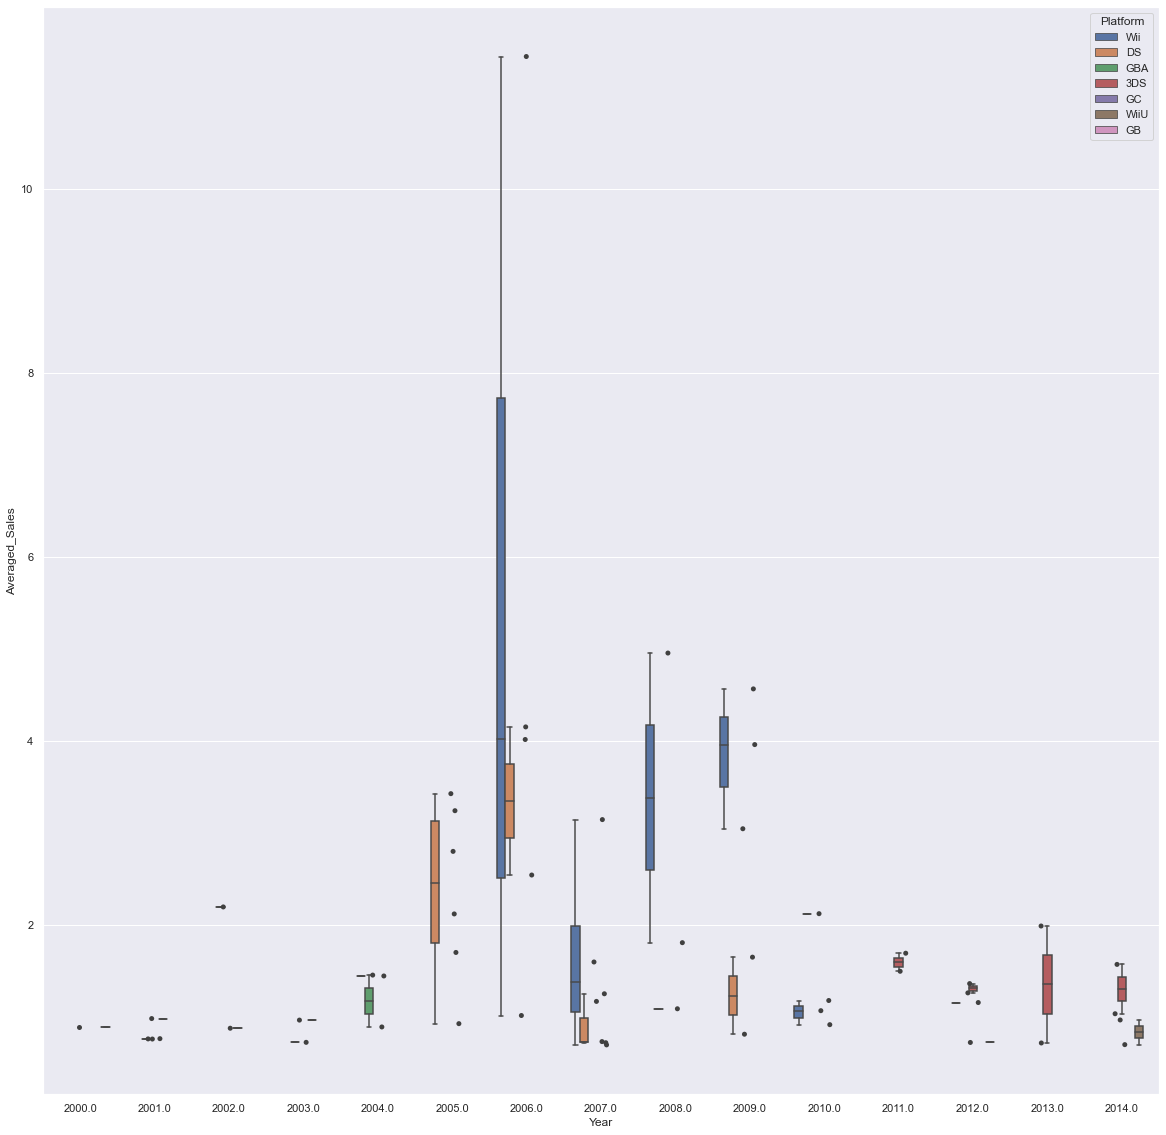

In [26]:
plt.figure(figsize=(20, 20))
sns.boxplot(data = dfNin, x = "Year", y = "Averaged_Sales", whis = 1.5, hue ="Platform")
# swarm plot to display the datapoints over the box plot
sns.stripplot(data = dfNin, x = "Year", y = "Averaged_Sales", color = "0.25")

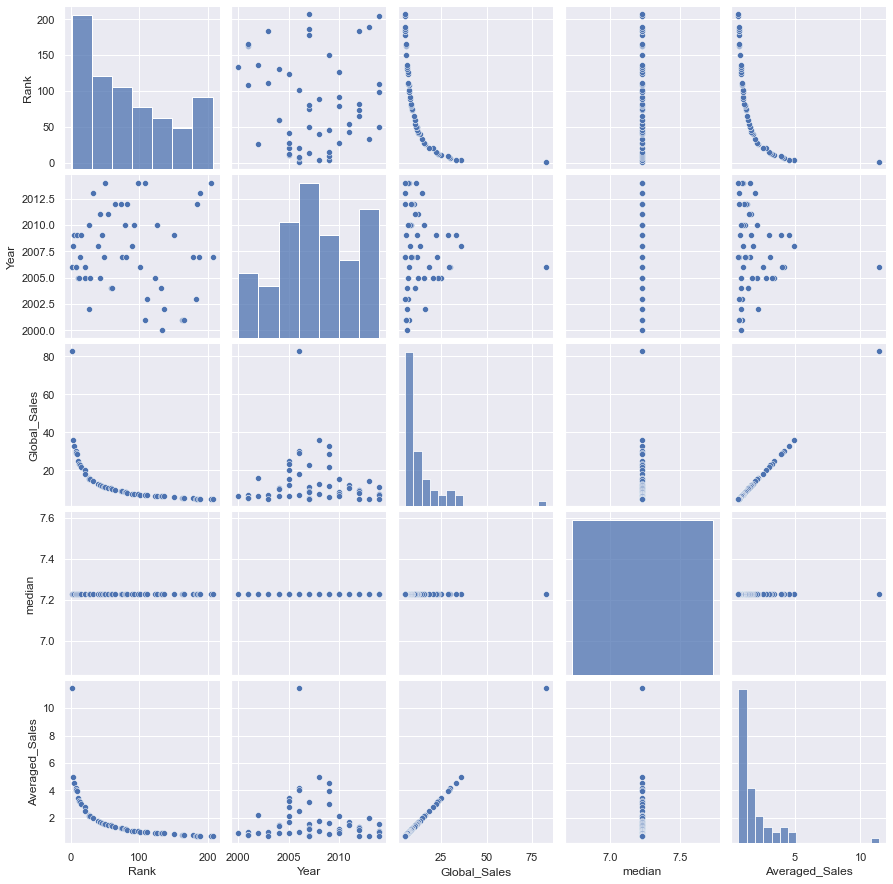

In [27]:
sns.pairplot(dfNin)

# Beginning of round 3 EAD with all listed datas: 

In [28]:
def load_and_process_all(filePath):
    import pandas as pd
    import statistics as stsc
    dfClean = (
        pd.read_csv(filePath,
        usecols = ["Rank", "Name", "Publisher", "Platform", "Genre", "Global_Sales", "Year"]) # So far our only focus of work
        .sort_values(by= "Global_Sales", ascending = False) # Cash money check
        .loc[lambda x: x["Year"] >= 2000] # Check for only recent games
        .dropna(axis = 0, thresh = 3) # Drop any NA values completely
        .loc[lambda x: x["Global_Sales"].between(15, 90.00)]
        #Excessive low number sales mess up our median so we are removing it for now by specifying values between 15-90
        .reset_index(drop=True) # Reset index so we don't mess up orders
    )


    dfWii = (
        dfClean
        .loc[lambda x: x["Rank"] <= 3500] # Nothing ranked lower than 2500
        .assign(Averaged_Sales = lambda x: x["Global_Sales"]/stsc.median(dfClean["Global_Sales"])) #Putting the sales number over its median to try and mitigate issues from the outliers
        .sort_values(by= "Averaged_Sales", ascending = False) # Re-sort in case any vales got changed
        .reset_index(drop = True) # Order things nicely
    )
    
    return dfWii

In [29]:
dfAll = load_and_process_all("../../data/raw/Video_game_sales_db.csv")
dfAll.head(5)

,Rank,Name,Platform,Year,Genre,Publisher,Global_Sales,Averaged_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,82.74,3.776358
1,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,35.82,1.634870
2,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,33.00,1.506162
3,7,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,30.01,1.369694
4,8,Wii Play,Wii,2006.0,Misc,Nintendo,29.02,1.324509


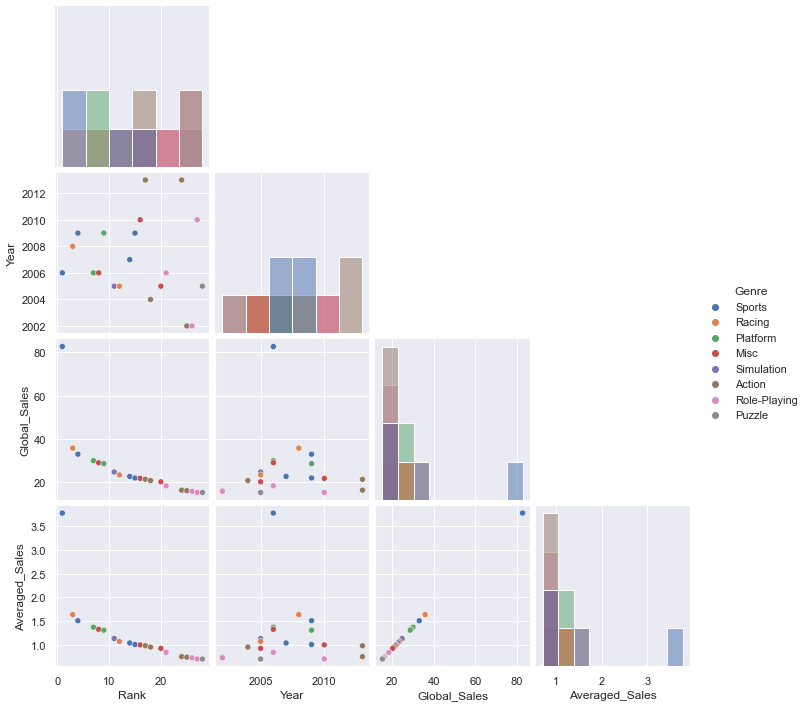

In [30]:
sns.pairplot(dfAll, hue = "Genre", diag_kind="hist", corner = True)

<AxesSubplot:xlabel='Genre', ylabel='Averaged_Sales'>

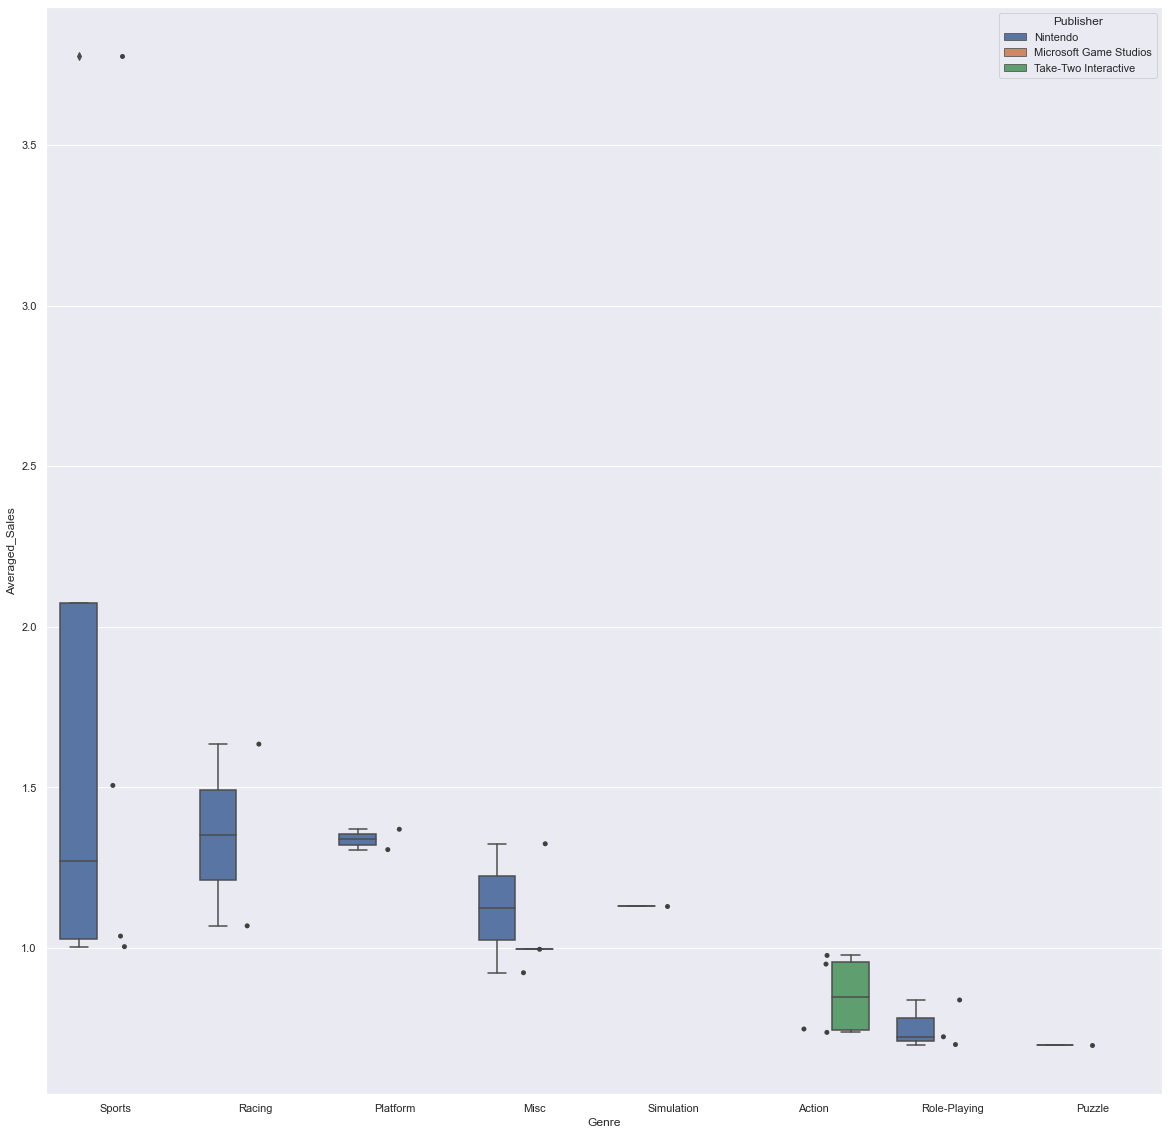

In [31]:
plt.figure(figsize=(20, 20))
sns.boxplot(data = dfAll, x = "Genre", y = "Averaged_Sales",hue = "Publisher")
# swarm plot to display the datapoints over the box plot
sns.stripplot(data = dfAll, x = "Genre", y = "Averaged_Sales", color = "0.25")

<Figure size 1440x1440 with 0 Axes>

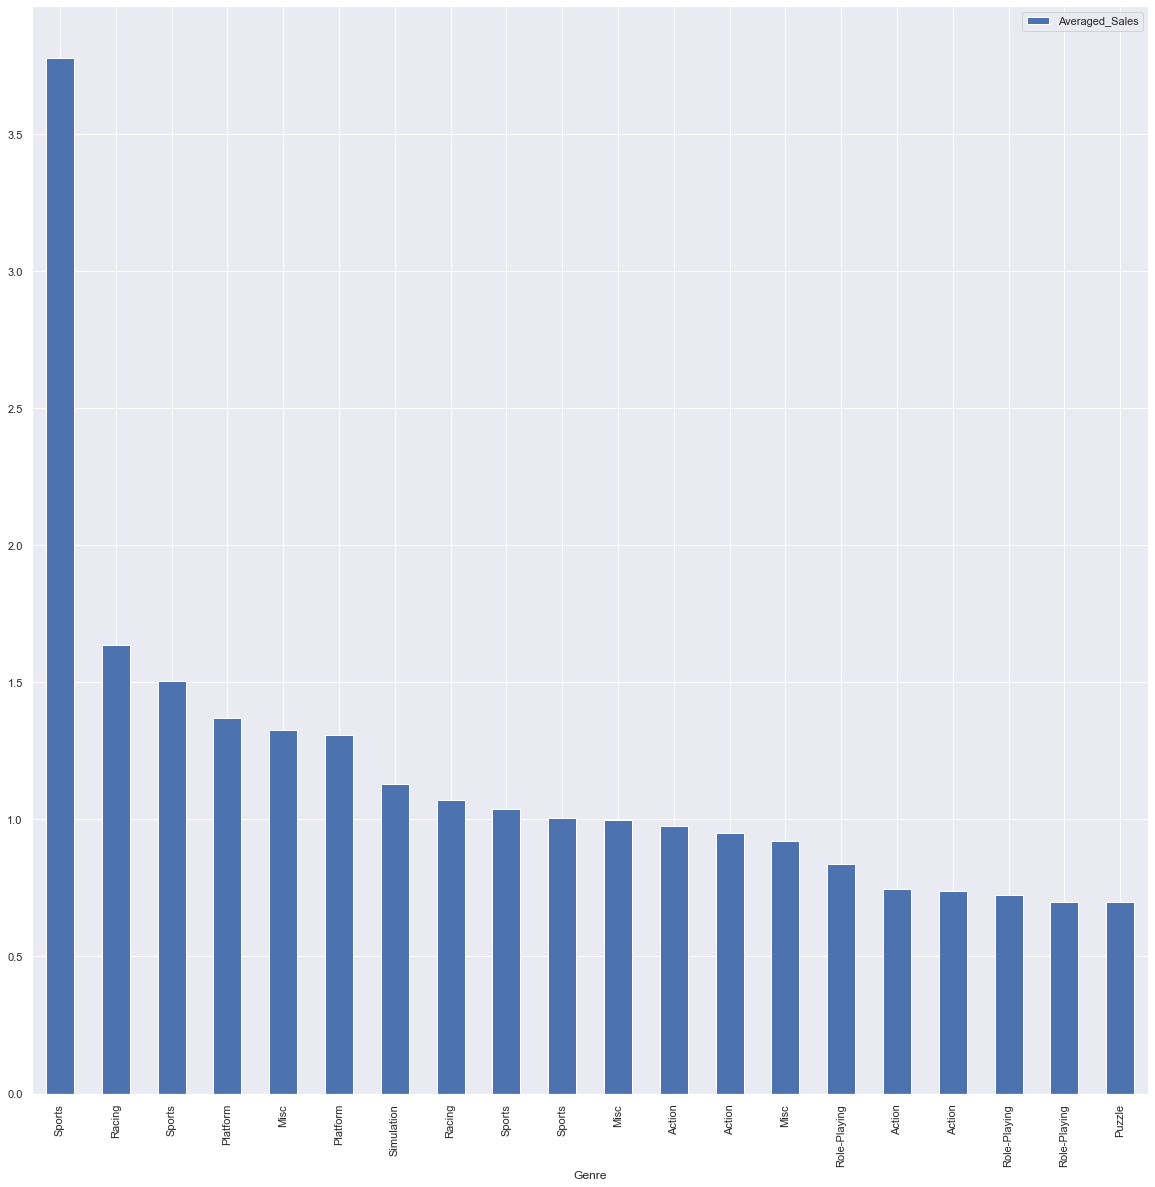

In [119]:
plt.figure(figsize=(20, 20))
b = dfAll.plot.bar(x = "Genre", y = "Averaged_Sales", stacked = True, figsize=(20,20))

# Chain method modules

In [33]:
# The global sales account for all regional sales so I am omitting the sales by region for this exploration
from scripts import load_and_process#from analysis.scripts import load_and_process
dfAllM = load_and_process.load_and_process_all("../../data/raw/Video_game_sales_db.csv")
dfWiiM= load_and_process.load_and_process_wii("../../data/raw/Video_game_sales_db.csv")
#Nintendo method currently not working even tho other modules are working
dfNinM = load_and_process.load_and_process_nintendo("../../data/raw/Video_game_sales_db.csv")

In [34]:
dfAllM

,Rank,Name,Platform,Year,Genre,Publisher,Global_Sales,Averaged_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,82.74,3.700358
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,40.24,1.799642
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,35.82,1.601968
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,33.00,1.475850
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,31.37,1.402952
5,6,Tetris,GB,1989.0,Puzzle,Nintendo,30.26,1.353309
6,7,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,30.01,1.342129
7,8,Wii Play,Wii,2006.0,Misc,Nintendo,29.02,1.297853
8,9,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,28.62,1.279964
9,10,Duck Hunt,NES,1984.0,Shooter,Nintendo,28.31,1.266100


In [35]:
dfWiiM

,Rank,Name,Platform,Year,Genre,Global_Sales,Averaged_Sales
0,1,Wii Sports,Wii,2006.0,Sports,82.74,11.443983
1,3,Mario Kart Wii,Wii,2008.0,Racing,35.82,4.954357
2,4,Wii Sports Resort,Wii,2009.0,Sports,33.00,4.564315
3,8,Wii Play,Wii,2006.0,Misc,29.02,4.013831
4,9,New Super Mario Bros. Wii,Wii,2009.0,Platform,28.62,3.958506
5,14,Wii Fit,Wii,2007.0,Sports,22.72,3.142462
6,15,Wii Fit Plus,Wii,2009.0,Sports,22.00,3.042877
7,40,Super Smash Bros. Brawl,Wii,2008.0,Fighting,13.04,1.803596
8,49,Super Mario Galaxy,Wii,2007.0,Platform,11.52,1.593361
9,61,Just Dance 3,Wii,2011.0,Misc,10.26,1.419087


In [36]:
dfNinM

,Rank,Name,Platform,Year,Genre,Publisher,Global_Sales,Averaged_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,82.74,11.443983
1,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,35.82,4.954357
2,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,33.00,4.564315
3,7,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,30.01,4.150761
4,8,Wii Play,Wii,2006.0,Misc,Nintendo,29.02,4.013831
5,9,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,28.62,3.958506
6,11,Nintendogs,DS,2005.0,Simulation,Nintendo,24.76,3.424620
7,12,Mario Kart DS,DS,2005.0,Racing,Nintendo,23.42,3.239281
8,14,Wii Fit,Wii,2007.0,Sports,Nintendo,22.72,3.142462
9,15,Wii Fit Plus,Wii,2009.0,Sports,Nintendo,22.00,3.042877


In [108]:
df2019G = dfAllM.groupby(["Genre","Publisher", "Year", "Platform"]).sum()["Global_Sales"]
#df2019G
dfG = pd.DataFrame(df2019G)
dfG.head(25)

Global_Sales
Genre        Publisher              Year   Platform              
Action       Take-Two Interactive   2002.0 PS2              16.15
                                    2004.0 PS2              20.81
                                    2013.0 PS3              21.40
                                           X360             16.38
Misc         Microsoft Game Studios 2010.0 X360             21.82
             Nintendo               2005.0 DS               20.22
                                    2006.0 Wii              29.02
Platform     Nintendo               1985.0 NES              40.24
                                    1988.0 NES              17.28
                                    1989.0 GB               18.14
                                    1990.0 SNES             20.61
                                    2006.0 DS               30.01
                                    2009.0 Wii              28.62
Puzzle       Nintendo               1989.0 GB               30.26
                                    2005.0 DS               15.30
Racing       Nintendo               2005.0 DS               23.42
                                    2008.0 Wii              35.82
Role-Playing Nintendo               1996.0 GB               31.37
                                    1999.0 GB               23.10
                                    2002.0 GBA              15.85
                                    2006.0 DS               18.36
                                    2010.0 DS               15.32
Shooter      Nintendo               1984.0 NES              28.31
Simulation   Nintendo               2005.0 DS               24.76
Sports       Nintendo               2006.0 Wii              82.74

<Figure size 1800x1800 with 0 Axes>

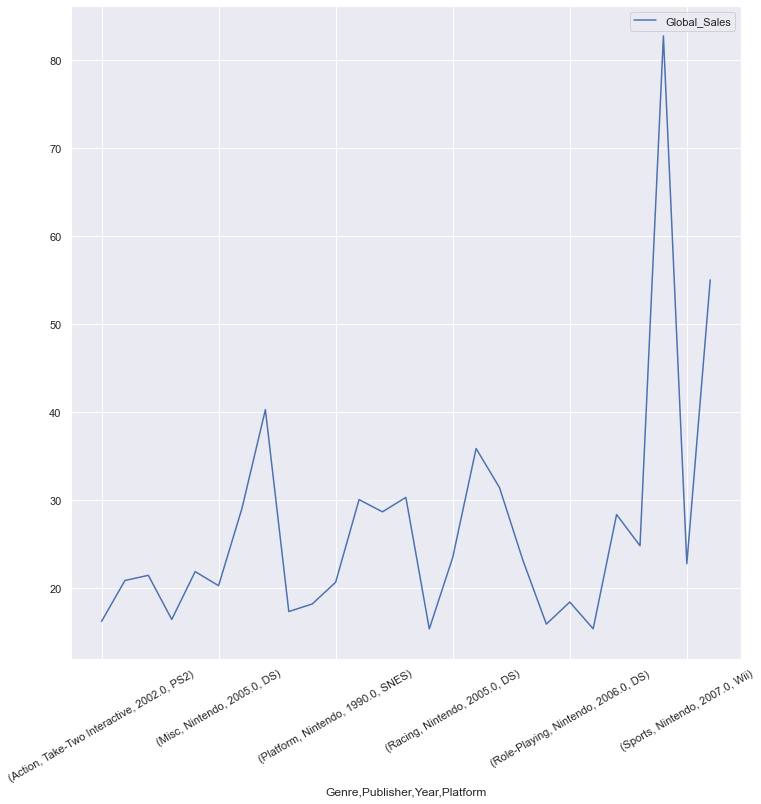

In [121]:
plt.figure(figsize=(25, 25))
dfG.plot(figsize=(12,12))
plt.xticks(rotation=30) 
plt.show()